In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
import pandas as pd
a=pd.read_csv('marks.txt',header=None)
a.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [10]:
a.shape

(100, 3)

In [11]:
X=a.iloc[:,:-1] # all columns except last column
Y=a.iloc[:,-1] # target values, last column of the data frame
admitted=a.loc[Y==1]# to filter out who got admitted
not_admitted=a.loc[Y==0]# filter out who didnt get admission

In [12]:
X.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


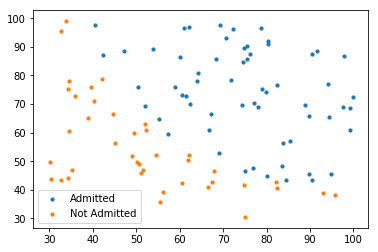

In [14]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10,label='Admitted')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:, 1],s=10,label='Not Admitted')
plt.legend()
plt.show()

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
# fitting logistic regression to the training set
regressor=LogisticRegression()
regressor.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred=regressor.predict(X_test)
print(y_pred)

[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1]


In [26]:
score=regressor.score(X_test,Y_test)
print(score)

0.95


In [27]:
regressor.coef_

array([[0.03032132, 0.03124498]])

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=2) #K=2
knn.fit(X_train,Y_train) # fitting x_train and y_train
print('KNN Score=',knn.score(X_test,Y_test)*100)
prediction=knn.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
print('confusion Matrix is:',cm,sep='\n')

KNN Score= 75.0
confusion Matrix is:
[[ 7  1]
 [ 0 12]]


In [34]:
probs=regressor.predict_proba(X_test) # the first row, 59% chance is there for a student to get admitted, 40% chance to not get 
probs                                 #admitted so it is classified as '1'.

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [37]:
from sklearn import metrics
prob_positive=probs[:,1] # to column getting admitted
fpr, tpr, threshold=metrics.roc_curve(Y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)


Area under the curve: 0.9895833333333334


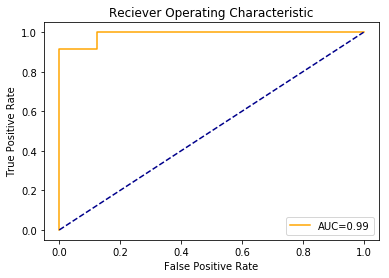

In [39]:
import matplotlib.pyplot as plt
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()